<a href="https://colab.research.google.com/github/gulbaharyildiz/Apple_Fruit_Detection/blob/main/Counting_lemons3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!git clone https://github.com/Ankit-py/Counting-Fruits-from-image.git

fatal: destination path 'Counting-Fruits-from-image' already exists and is not an empty directory.


In [26]:
%tensorflow_version
import tensorflow
print(tensorflow.__version__)

Currently selected TF version: 2.x
Available versions:
* 1.x
* 2.x
2.4.1


In [58]:
!pip install matplotlib

In [1]:
#importing required packages
import numpy as np
from cv2 import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import skimage.io as sk
import time

from __future__ import print_function
from skimage.feature import peak_local_max
from skimage.morphology import watershed  # using watershed algorithm for segmentation
from scipy import ndimage

In [4]:
def show(img):
  plt.imshow(img)
  plt.show()

(350, 350, 3)


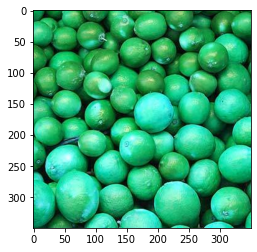

In [12]:
#Loading the image
fp = "/content/Counting-Fruits-from-image/Lemons/lemon1.jpg"
img = cv2.imread(fp)
plt.imshow(img)
print(img.shape)

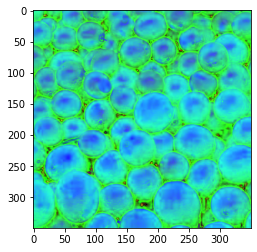

In [13]:
#converting to HSV color model
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
show(hsv)

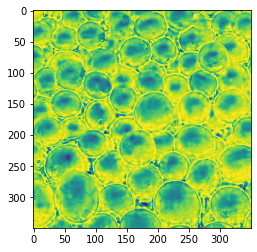

In [14]:
h, s, v = cv2.split(hsv)
show(s)

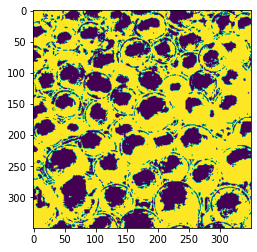

In [15]:
_, thr = cv2.threshold(s, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
show(thr)

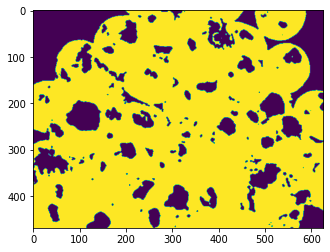

In [9]:
#blurring the image
blur = cv2.medianBlur(thr, 5)
show(blur)

### finding contours

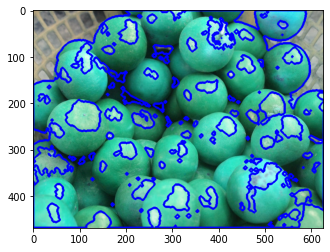

number of lemons found including error =  143
Seconds taken for prediction: 0.2282421588897705


In [10]:
start = time.time()
copy1 = img.copy()
contours, hierarchy = cv2.findContours(blur,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(copy1, contours, -1, (0,0,255), 3)
show(copy1)
print("number of lemons found including error = ", len(contours))
end = time.time()
print ("Seconds taken for prediction: {}".format(end - start))